# Westbound I-94 Traffic 

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Exploratory Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

![Minneapolis - St. Paul](mn-stpl.png)

### Project Description

**Goal/Purpose:** 

The goal of this project is to determine indicators of heavy traffic on I-94. 

<p>&nbsp;</p>

**Questions to be Answered:**

- How does weather impact traffic? 
- What are the seasonal impacts on traffic?
- What is the average impact to travel during heavy commute periods?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

Briefly describe assumptions,processing steps, and the scope of this project.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a csv file about Minneapolis-St.Paul traffic. The dataset lasts from 2012-2018 and contains hourly information about westbound traffic on I-94, including weather and holiday_traffic_traffics. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.
| Column  | Description |
| :------ | :---------- |
| holiday | Categorical US National holidays plus regional holiday, Minnesota State Fair |
| temp | Numeric Average temp in kelvin |
| rain_1h | Numeric Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric Amount in mm of snow that occurred in the hour  |
| clouds_all | Numeric Percentage of cloud cover |
| weather_main | Categorical Short textual description of the current weather |
| weather_description | Categorical Longer textual description of current weather |
| date_time | DateTime Hour of the data collected in local CST time |
| traffic_volume | Numeric Hourly I-94 ATR 301 reported westbound traffic  |
<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by John Hogue, Social Data Science & General Mills,  and the original source can be found on [Metro Interstate Traffic Volume Data Set - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [546]:
# Ignore warnings if needed
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('dark_background')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

### Loading Data

In [547]:
# Load DataFrame
file = 'metro_interstate_traffic_volume.csv'
traffic = pd.read_csv(file)

### Basic Data Exploration

#### Number of Rows and Columns

In [548]:
# Show rows and columns count
print(f"Rows count: {traffic.shape[0]}\nColumns count: {traffic.shape[1]}")

Rows count: 48204
Columns count: 9


#### Display First and Last Rows

In [549]:
# Look at first 5 rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.280,0.000,0.000,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.360,0.000,0.000,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.580,0.000,0.000,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.130,0.000,0.000,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.140,0.000,0.000,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [550]:
# Look at last 5 rows
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.450,0.000,0.000,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.760,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.730,0.000,0.000,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.090,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.120,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


#### Check Data Types

In [551]:
# Show data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


- `holiday`, `weather_main`, `weather_description`, `date_time` are **strings**.
- `temp`, `rain_1h`, and `snow_1h` are **floats**.
- `clouds_all` and `traffic_volume` are **integers**.

#### Check Missing Data

In [552]:
# Print percentage of missing values
missing_percent = traffic.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print(None)

---- Percentage of Missing Values (%) -----
holiday   99.873
dtype: float64


#### Check for Duplicate Rows

In [553]:
# Show number of duplicated rows
print(f"No. of entirely duplicated rows: {traffic.duplicated().sum()}")

# Show duplicated rows
traffic[traffic.duplicated()]

No. of entirely duplicated rows: 17


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,NaN,286.290,0.000,0.000,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,NaN,289.060,0.000,0.000,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,NaN,289.775,0.000,0.000,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,NaN,287.860,0.000,0.000,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,NaN,279.287,0.000,0.000,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,NaN,267.890,0.000,0.000,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,NaN,254.220,0.000,0.000,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,NaN,295.010,0.000,0.000,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,NaN,292.840,0.000,0.000,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,NaN,294.520,0.000,0.000,1,Clear,sky is clear,2017-06-30 11:00:00,4725


#### Check Uniqueness of Data

In [554]:
# Print the number of unique values
num_unique = traffic.nunique().sort_values()
print('---- Number of Unique Values -----')
print(num_unique)

---- Number of Unique Values -----
holiday                   11
weather_main              11
snow_1h                   12
weather_description       38
clouds_all                60
rain_1h                  372
temp                    5843
traffic_volume          6704
date_time              40575
dtype: int64


#### Check Data Range

In [555]:
# Print summary statistics
traffic.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,"48,204.000","48,204.000","48,204.000","48,204.000",48204,48204,48204,"48,204.000"
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.206,0.334,0.000,49.362,NaN,NaN,NaN,"3,259.818"
std,NaN,13.338,44.789,0.008,39.016,NaN,NaN,NaN,"1,986.861"
min,NaN,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0.000
25%,NaN,272.160,0.000,0.000,1.000,NaN,NaN,NaN,"1,193.000"
50%,NaN,282.450,0.000,0.000,64.000,NaN,NaN,NaN,"3,380.000"
75%,NaN,291.806,0.000,0.000,90.000,NaN,NaN,NaN,"4,933.000"


### Areas to Fix
**Data Types**
- `date_time` should be a **datetime** type instead.

**Missing Data**
- `holiday` column has a significant amount of missing data, which likely is indicative of a "normal" day not a holiday 

**Duplicate Rows**
- 17 duplicate rows to be removed

**Uniqueness of Data**
- Data uniqueness does not pose a concern

**Data Range**
- `rain_1h` and `snow_1h` both have a fairly limited range of data, however it appears that `rain_1h` may have an erroneous entry for it's maximum value 
- `temp_K` shows a minimum value of 0 which is outside of the reasonable range of data

---

# 3

## Data Preprocessing

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Rename Columns

In [556]:
# Rename columns
columns_to_rename = {
    'holiday':'holiday',
    'temp':'temp_K',
    'rain_1h':'rain_mmph',
    'snow_1h':'snow_mmph',
    'clouds_all':'cloudcover',
    'weather_main':'weather_main',
    'weather_description':'weather_description',
    'date_time':'date_time',
    'traffic_volume':'traffic_volume'
}
traffic.rename(columns=columns_to_rename, inplace=True)

In [557]:
# Verify columns are renamed
traffic.columns

Index(['holiday', 'temp_K', 'rain_mmph', 'snow_mmph', 'cloudcover',
       'weather_main', 'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Drop Redundant Columns

In [558]:
# Check the proportion of the most frequent value in each column
print('---- Frequency of the Mode (%) -----')
mode_dict = {col: (traffic[col].value_counts().iat[0] / traffic[col].size * 100) for col in traffic.columns}
mode_series = pd.Series(mode_dict)
mode_series

---- Frequency of the Mode (%) -----


holiday                0.015
temp_K                 0.266
rain_mmph             92.808
snow_mmph             99.869
cloudcover            34.109
weather_main          31.458
weather_description   24.199
date_time              0.012
traffic_volume         0.104
dtype: float64

In [559]:
# Show the value frequency of each column greater than the mode's threshold
threshold = 80
for col in mode_series[mode_series > threshold].index:
    print(traffic[col].value_counts(dropna=False))
    print()

rain_mmph
0.000    44737
0.250      948
0.510      256
1.020      123
0.300      121
         ...  
1.280        1
1.470        1
4.660        1
2.080        1
2.350        1
Name: count, Length: 372, dtype: int64

snow_mmph
0.000    48141
0.050       14
0.060       12
0.510        6
0.250        6
0.130        6
0.100        6
0.320        5
0.170        3
0.440        2
0.080        2
0.210        1
Name: count, dtype: int64



Despite both of these columns having limited range of data, both are highly important to the intent of this analysis. The `snow_mmph` column will need to be considered very cautiously due to it's lack of diversity in data. 

### Changing Data Types

In [560]:
# Convert columns to the right data types
traffic['date_time'] = pd.to_datetime(traffic['date_time'], infer_datetime_format=True)

In [561]:
# Verify conversion
assert ptypes.is_datetime64_any_dtype(traffic['date_time']) 

### Dropping Duplicates

In [562]:
# Drop entirely duplicated rows
traffic.drop_duplicates(inplace=True, ignore_index=True)

In [563]:
# Verify rows dropped
assert traffic.duplicated().sum()==0

### Handling Missing Values

In [564]:
traffic['holiday'].fillna('na', inplace=True)

In [565]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48187 non-null  object        
 1   temp_K               48187 non-null  float64       
 2   rain_mmph            48187 non-null  float64       
 3   snow_mmph            48187 non-null  float64       
 4   cloudcover           48187 non-null  int64         
 5   weather_main         48187 non-null  object        
 6   weather_description  48187 non-null  object        
 7   date_time            48187 non-null  datetime64[ns]
 8   traffic_volume       48187 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


### Handling Unreasonable Data Ranges

In [566]:
traffic['rain_mmph'].describe()

count   48,187.000
mean         0.334
std         44.797
min          0.000
25%          0.000
50%          0.000
75%          0.000
max      9,831.300
Name: rain_mmph, dtype: float64

After looking into what reasonable amounts of rain in an hour are, it seems fairly standard that anything greater than 50 mm of rain in 1 hour is considered violent. After evaluating which rows indicate greater than 60 mm of rain per hour, appropriate rows will be dropped.

In [567]:
print(traffic[traffic.rain_mmph > 60])

      holiday  temp_K  rain_mmph  snow_mmph  cloudcover weather_main   
24870      na 302.110  9,831.300      0.000          75         Rain  \

      weather_description           date_time  traffic_volume  
24870     very heavy rain 2016-07-11 17:00:00            5535  


In [568]:
traffic = traffic[traffic.rain_mmph < 60]
print(len(traffic))

48186


In [569]:
traffic['temp_K'].describe()

count   48,186.000
mean       281.205
std         13.339
min          0.000
25%        272.160
50%        282.450
75%        291.804
max        310.070
Name: temp_K, dtype: float64

In [570]:
print(traffic[traffic.temp_K == 0])

      holiday  temp_K  rain_mmph  snow_mmph  cloudcover weather_main   
11898      na   0.000      0.000      0.000           0        Clear  \
11899      na   0.000      0.000      0.000           0        Clear   
11900      na   0.000      0.000      0.000           0        Clear   
11901      na   0.000      0.000      0.000           0        Clear   
11946      na   0.000      0.000      0.000           0        Clear   
11947      na   0.000      0.000      0.000           0        Clear   
11948      na   0.000      0.000      0.000           0        Clear   
11949      na   0.000      0.000      0.000           0        Clear   
11950      na   0.000      0.000      0.000           0        Clear   
11951      na   0.000      0.000      0.000           0        Clear   

      weather_description           date_time  traffic_volume  
11898        sky is clear 2014-01-31 03:00:00             361  
11899        sky is clear 2014-01-31 04:00:00             734  
11900        sk

While it's understandable that clear skies (as indicated in `weather_description`) would report 0 for `rain_mmph`,`snow_mmph`, and `cloudcover`, `temp_K` should have been recorded regardless of all other weather conditions. The number of data entries reporting a `temp_K` of 0 is low enough to be insignificant, therefore they will be removed as to not skew the data. 

In [571]:
traffic = traffic[traffic.temp_K > 0]
print(len(traffic) == 48186 - 10)

True


---

# 4

## Exploratory Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `date_time` impact on `traffic_volume`

<Axes: ylabel='Frequency'>

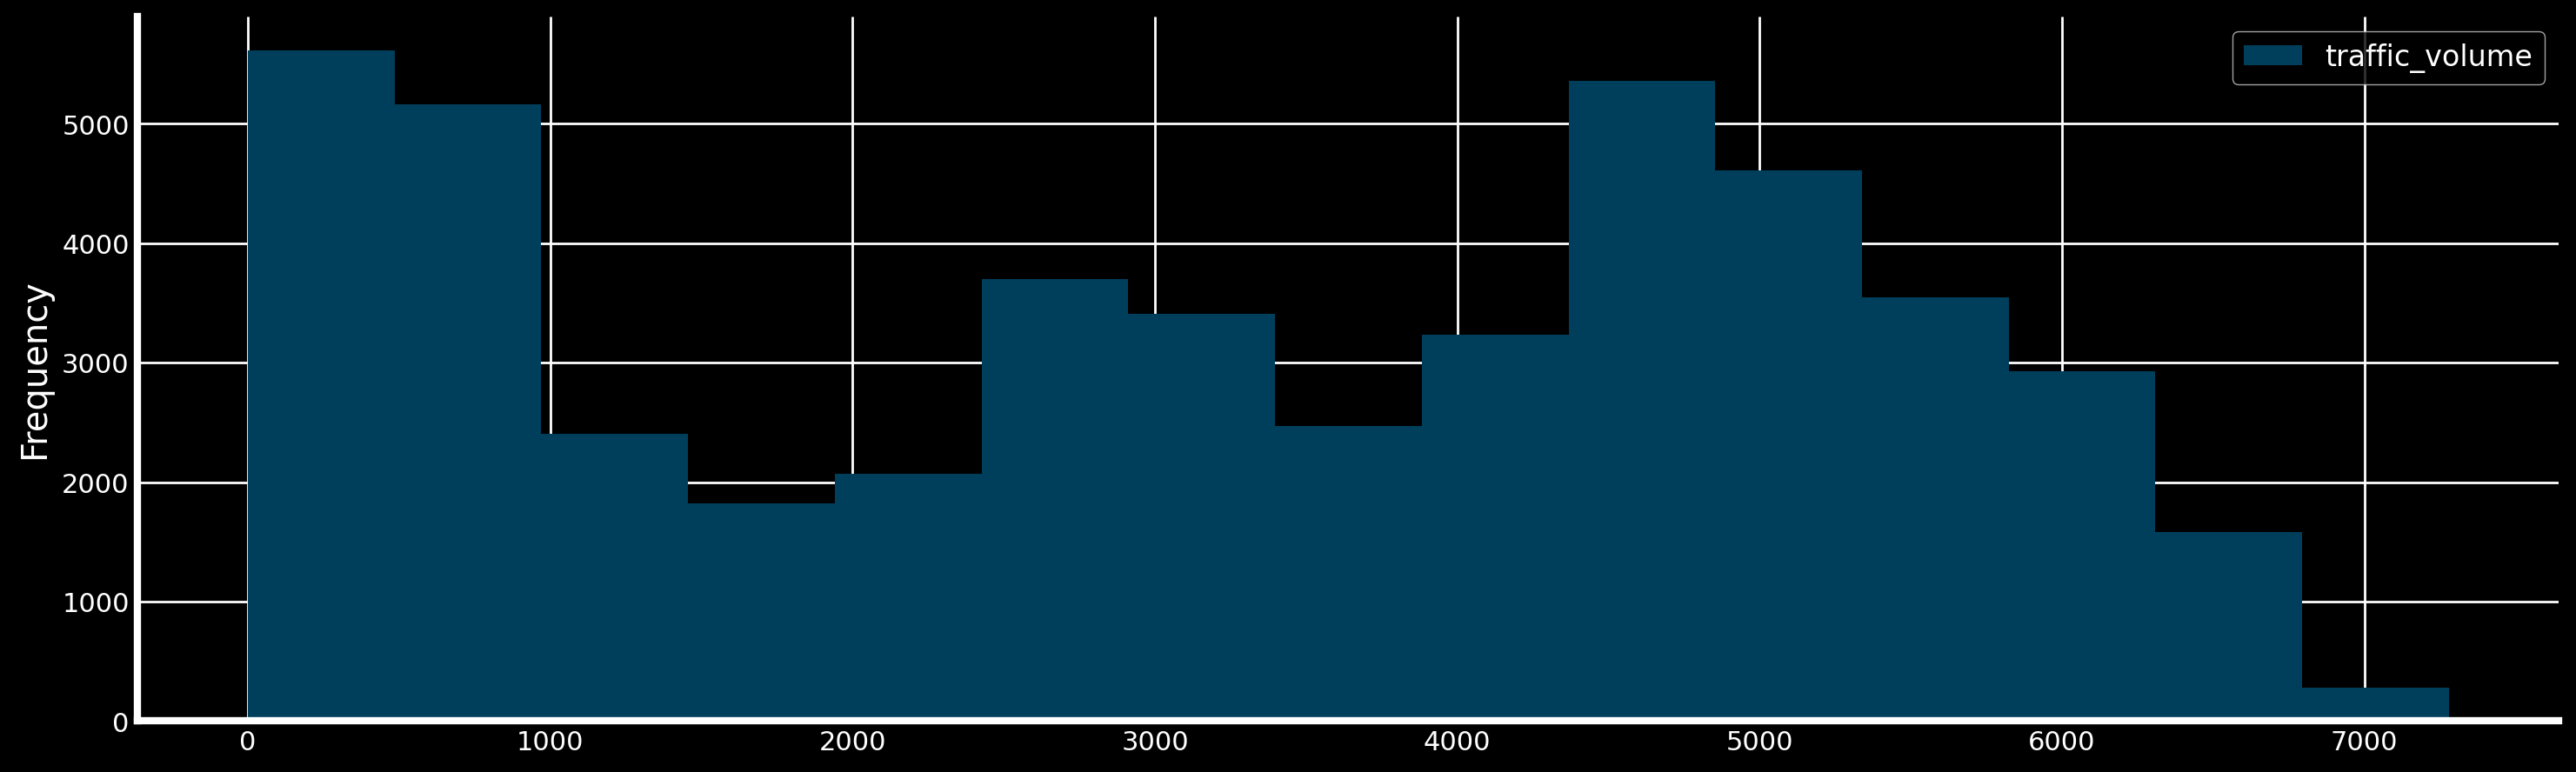

In [572]:
traffic.plot.hist(column='traffic_volume', bins=15)

In [573]:
traffic['traffic_volume'].describe()

count   48,176.000
mean     3,259.974
std      1,986.848
min          0.000
25%      1,194.000
50%      3,380.000
75%      4,933.000
max      7,280.000
Name: traffic_volume, dtype: float64

**Observations**
- Overall shape: appears to be bimodal, skews right
- High frequencies of no traffic and heavy traffic are likely indicative of commute traffic patterns given it's similar amounts frequencies and the data only records westbound traffic
- Roughly 25% of the time there's less than 1,192 cars on the road, this low amount of drivers on the roads is likely indicative of night hours

#### Investigating Day Traffic vs Night Traffic

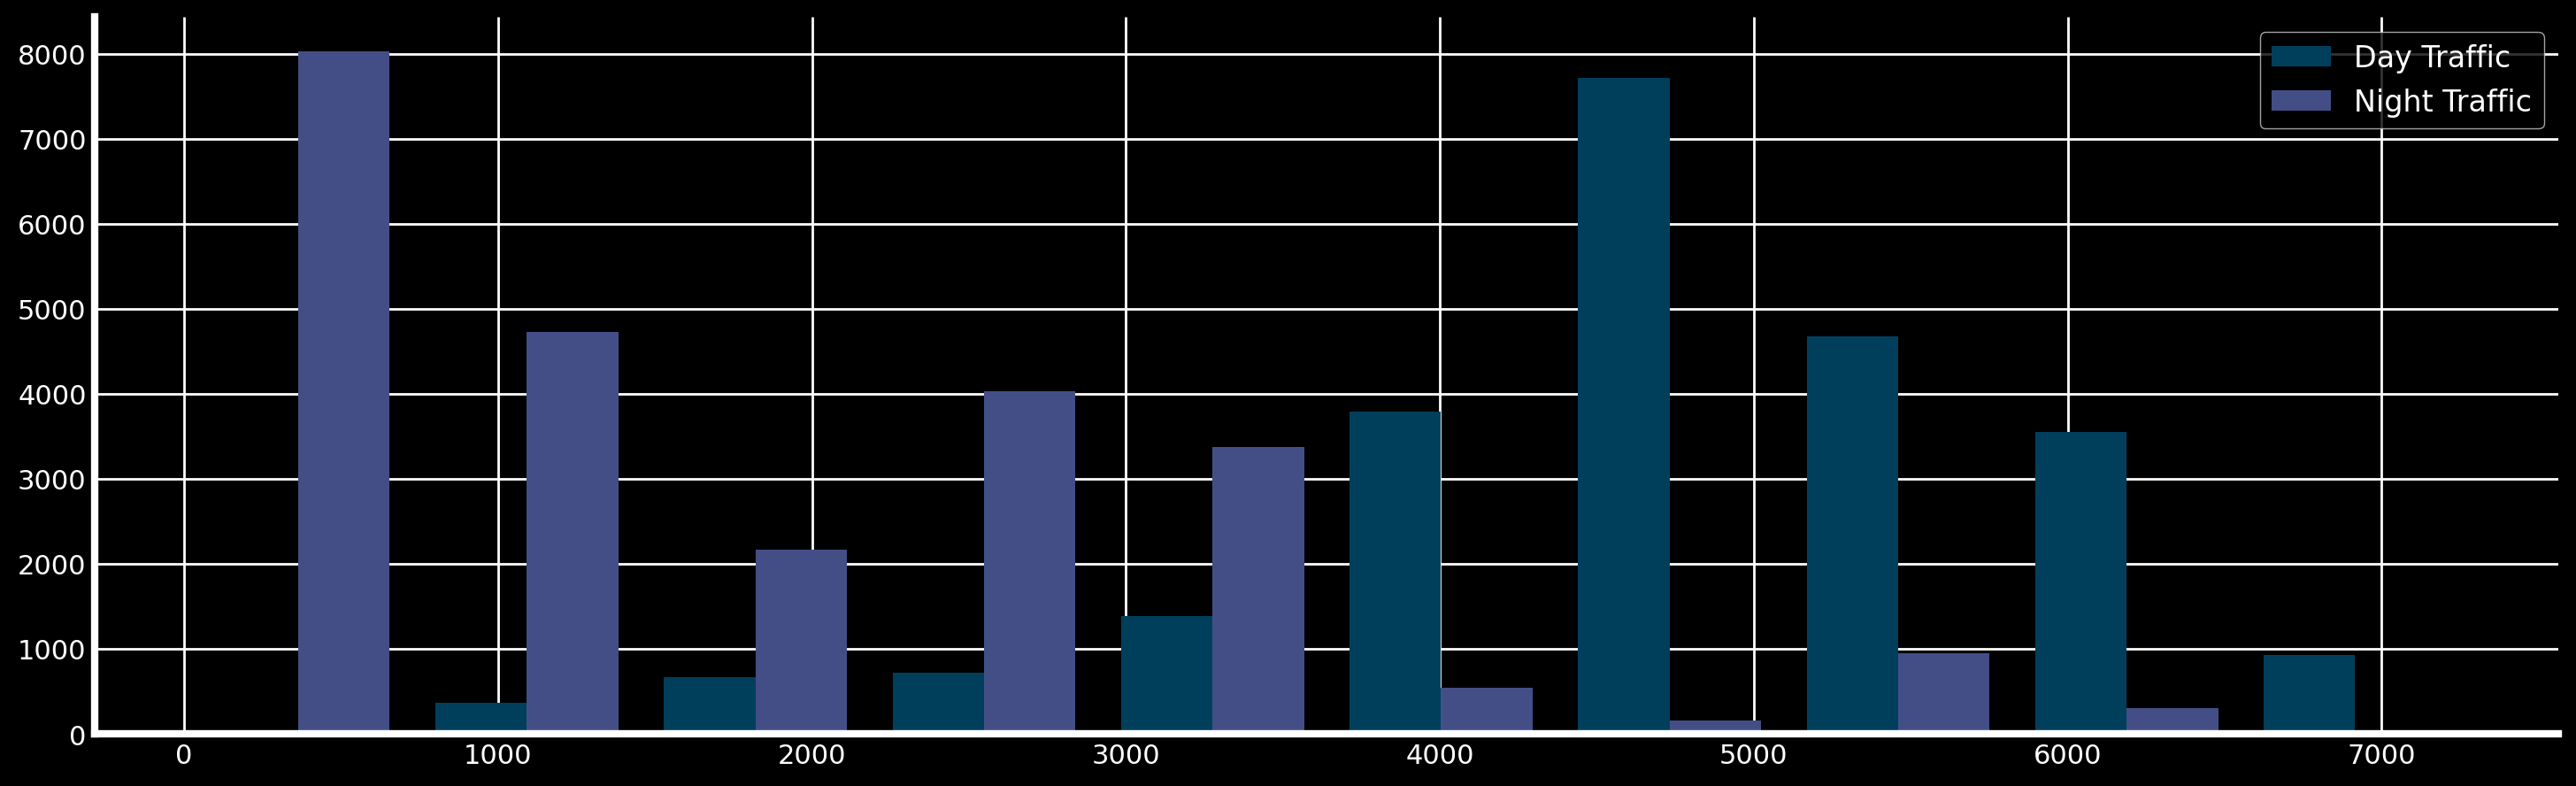

In [574]:
# Isolate the daytime data.
day_traffic = traffic[traffic['date_time'].dt.hour.between(7, 18)]

# Isolate the nighttime data.
night_traffic = traffic[~traffic['date_time'].dt.hour.between(7, 18)]

# Personal formatting
plt.hist([day_traffic['traffic_volume'], night_traffic['traffic_volume']], label=['Day Traffic', 'Night Traffic'])
plt.legend()
plt.show()

**Guided Instructions:**
- Plot the histograms of traffic_volume for both day and night
- Organize the two histograms side-by-side on a grid chart
- Both should have: a title, x- and y-labels
- Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly)


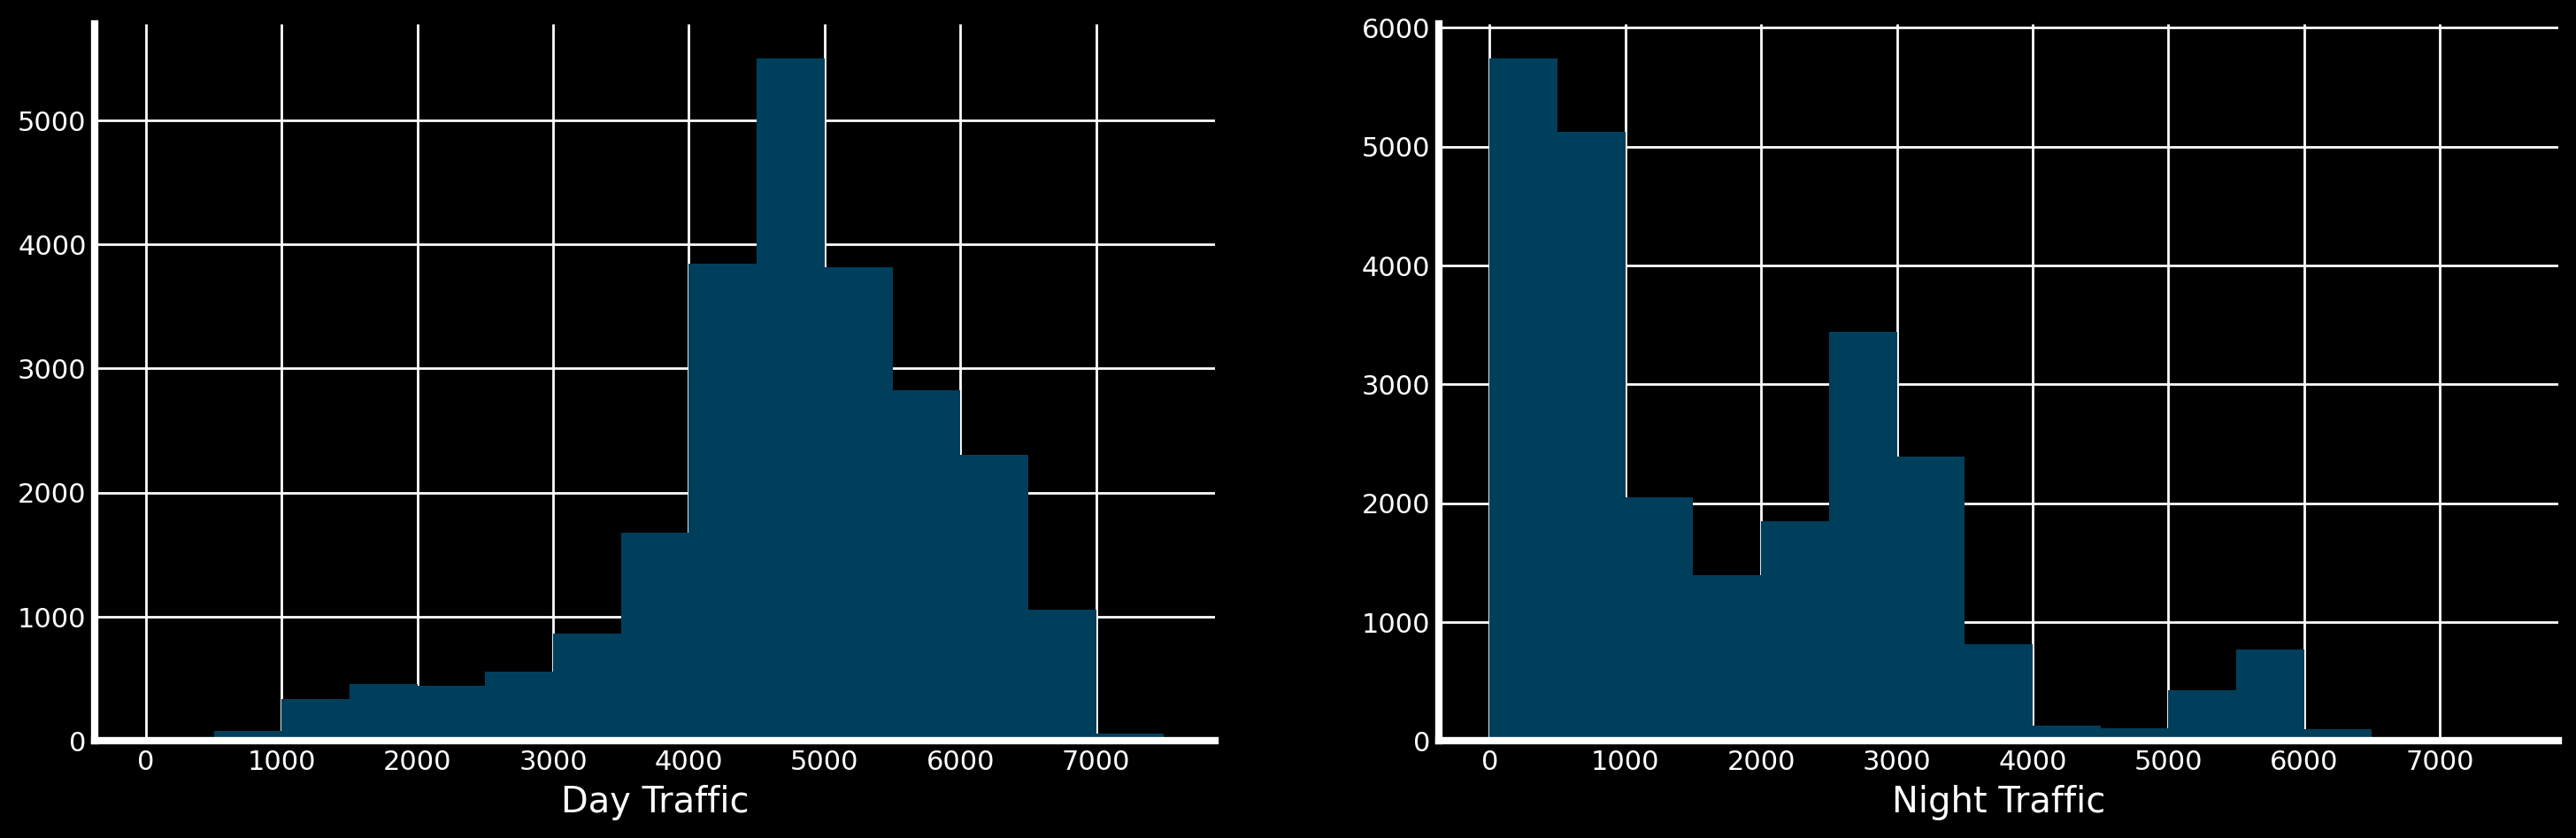

In [575]:
# Create grid
plt.figure()

# Normalize the range
bins = np.arange(0, 8000, 500)

#Plot the first chart
plt.subplot(1, 2, 1)
plt.hist(day_traffic['traffic_volume'], bins=bins, label='Day Traffic')
plt.xlabel('Day Traffic')

# Plot the second chart
plt.subplot(1, 2, 2)
plt.hist(night_traffic['traffic_volume'], bins=bins, label='Night Traffic')
plt.xlabel('Night Traffic')

plt.show()

In [576]:
day_traffic['traffic_volume'].describe()

count   23,864.000
mean     4,762.290
std      1,174.399
min          0.000
25%      4,252.000
50%      4,820.000
75%      5,559.000
max      7,280.000
Name: traffic_volume, dtype: float64

In [577]:
night_traffic['traffic_volume'].describe()

count   24,312.000
mean     1,785.341
std      1,441.757
min          0.000
25%        530.000
50%      1,287.000
75%      2,819.000
max      6,386.000
Name: traffic_volume, dtype: float64

**Observations**
- As expected, night time traffic volume is overall significantly lesser than daytime traffic
- When viewed separately the night traffic skews right, but the day traffic has closer to a normal distribution that skews slightly left
- Relatively low amounts of traffic (and no traffic) during the day could potentially be indicative of bad weather or holidays

As we are only interested in indicators of heavy traffic, we will move forward with only the `day_traffic` data.

Other aspects of the date_time column that could impact traffic are: 
- month
- day of the week
- hour of day 


#### Daytime Traffic Volume by Month

In [578]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1    4,495.614
2    4,715.096
3    4,889.410
4    4,906.894
5    4,911.122
6    4,897.963
7    4,594.640
8    4,928.302
9    4,870.518
10   4,921.395
11   4,704.094
12   4,374.970
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Traffic Volume by Month')

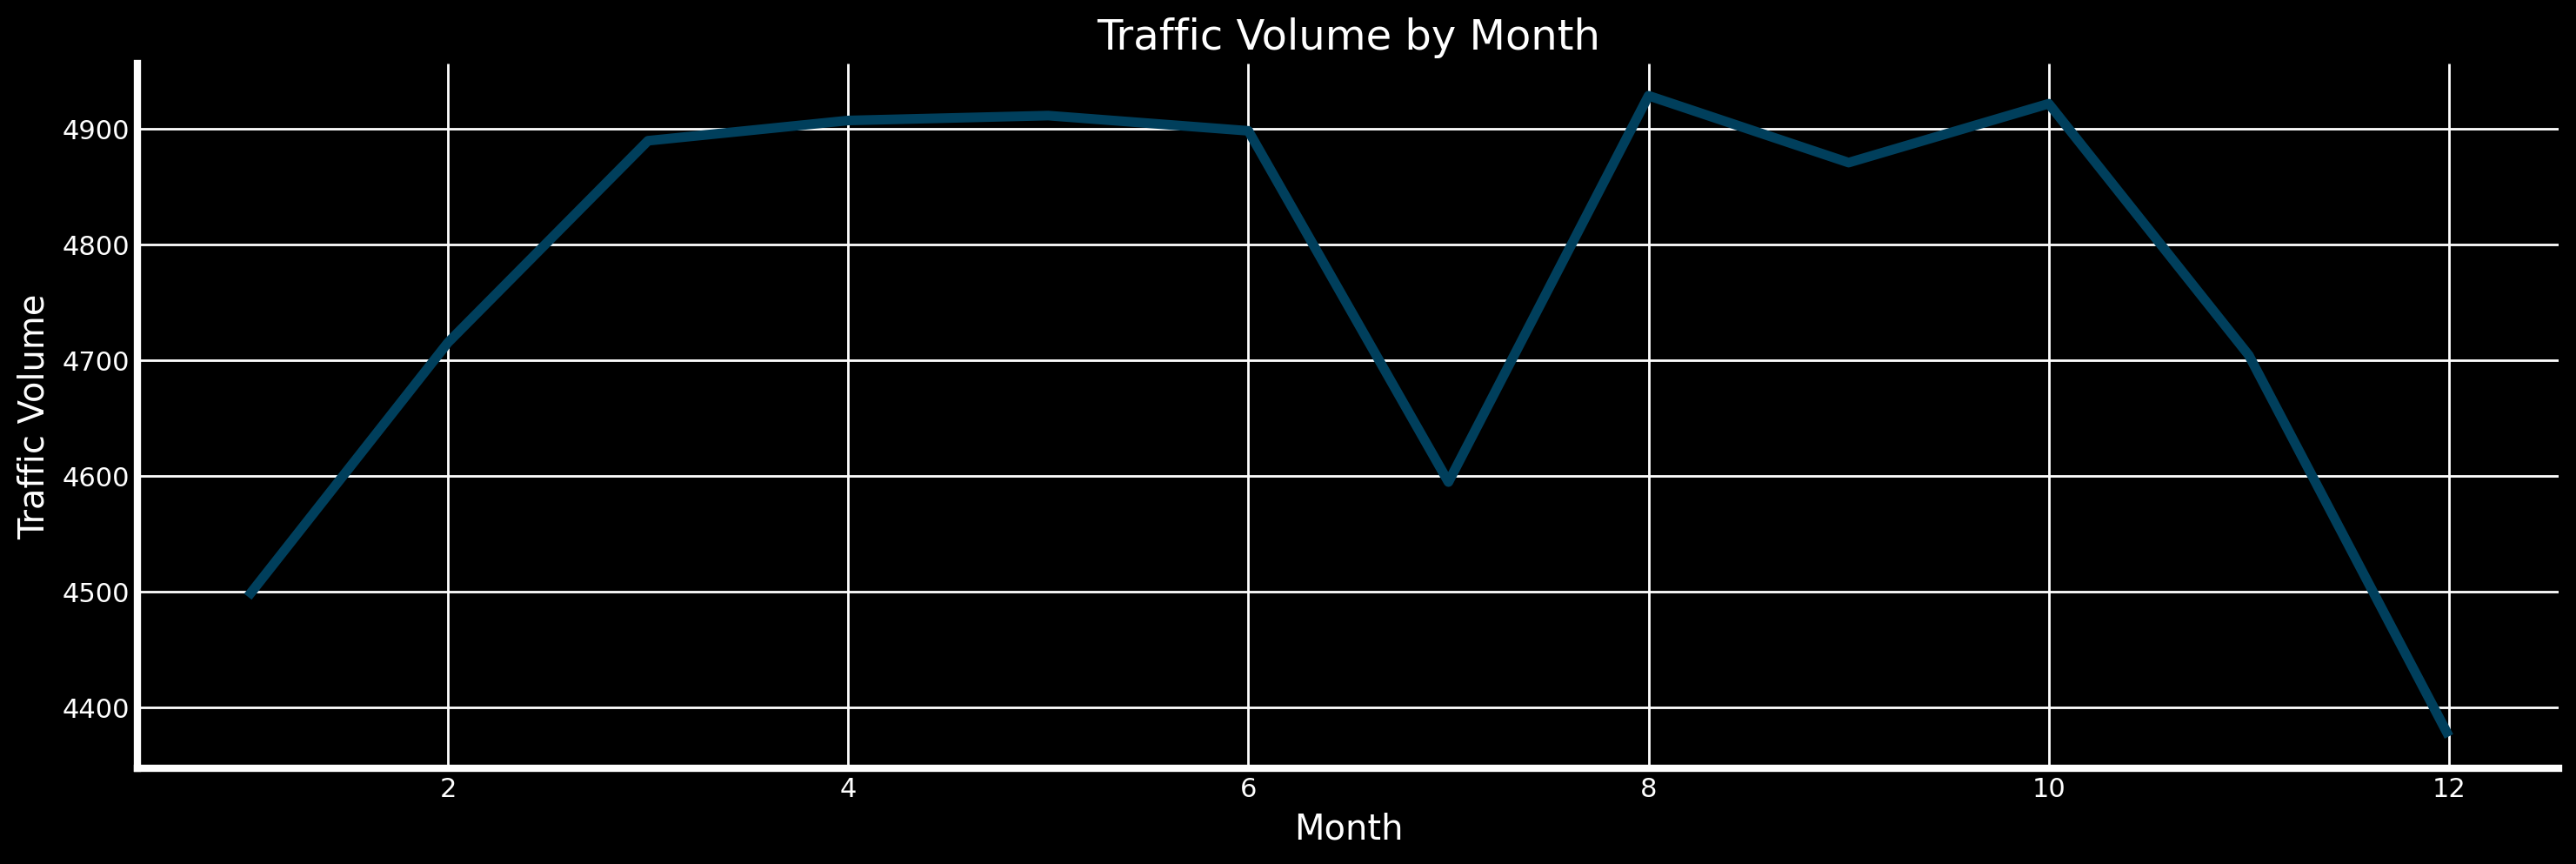

In [579]:

plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Month')


**Observations:**
- December and January have the least amount of heavy traffic
- July has an uncharacteristically low amount of heavy traffic
- Overall data appears consistent with the assumption that traffic is heavier during summer months and lesser in winter months

#### Daytime Traffic Volume by Day

In [580]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.day_of_week
by_day = day_traffic.groupby('dayofweek').mean(numeric_only=True)
by_day['traffic_volume']

dayofweek
0   4,893.370
1   5,189.580
2   5,284.701
3   5,311.304
4   5,292.182
5   3,927.250
6   3,437.791
Name: traffic_volume, dtype: float64

(Note: 0 is Monday, 6 is Sunday)

Text(0.5, 1.0, 'Traffic Volume by Day of the Week')

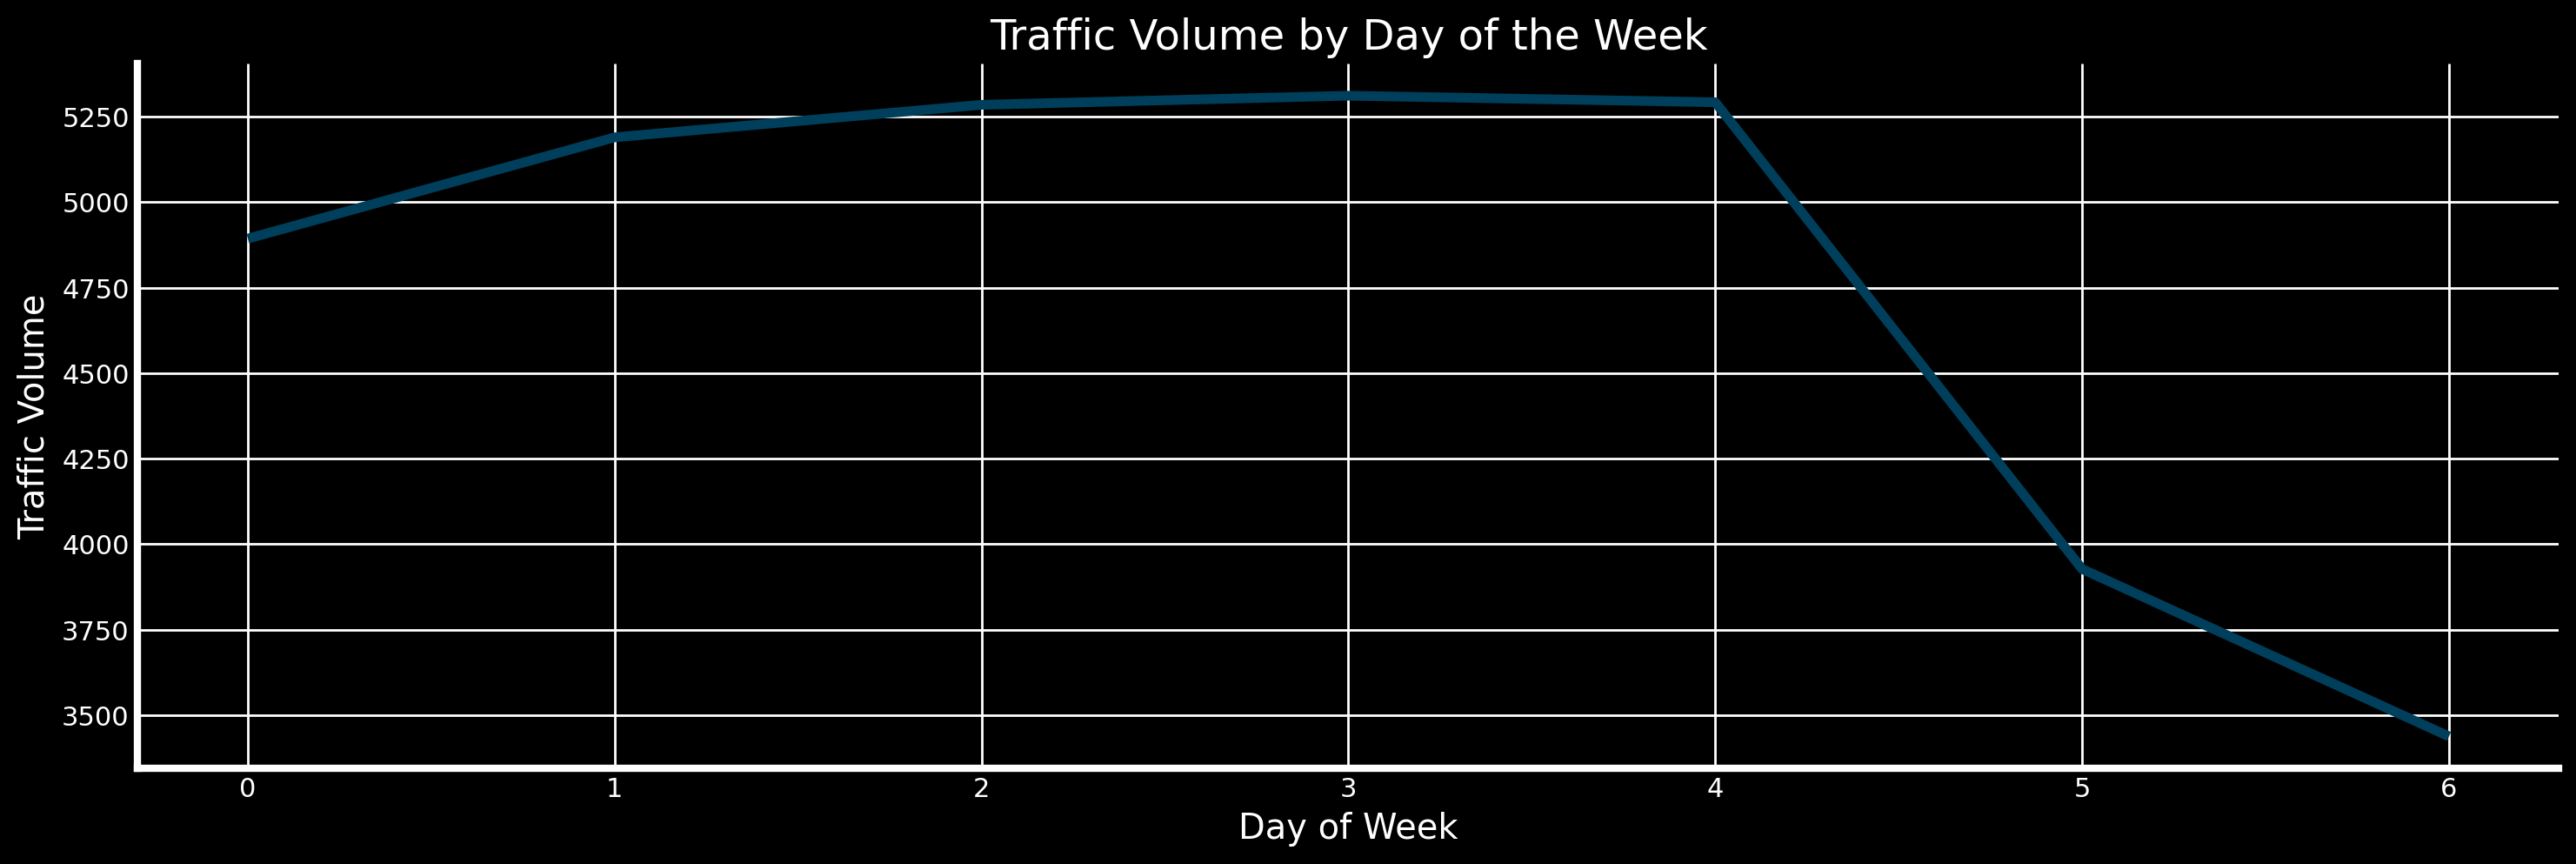

In [581]:
plt.plot(by_day['traffic_volume'])
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Day of the Week')

**Observations:**
- Traffic is heavier on weekdays than weekends, supporting the assumption that business commutes heavily impact traffic 

#### Daytime Traffic Volume by Hour

In [582]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
weekdays = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekdays.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7    6,030.414
8    5,503.498
9    4,895.269
10   4,377.942
11   4,633.229
12   4,855.115
13   4,858.882
14   5,152.996
15   5,593.062
16   6,189.474
17   5,785.009
18   4,434.352
Name: traffic_volume, dtype: float64
hour
7    1,590.406
8    2,339.691
9    3,111.624
10   3,686.632
11   4,044.155
12   4,372.483
13   4,362.297
14   4,358.544
15   4,342.457
16   4,339.694
17   4,151.920
18   3,811.792
Name: traffic_volume, dtype: float64


**Guided Instructions**
- Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.
    - One plot shows how traffic volume changes during business days and the other shows how it changes during weekends.
    - Add a title to each graph.
    - Bring both graphs to the same x- and y-axis range.

Text(0.5, 1.0, 'Weekend Traffic Volume by Hour')

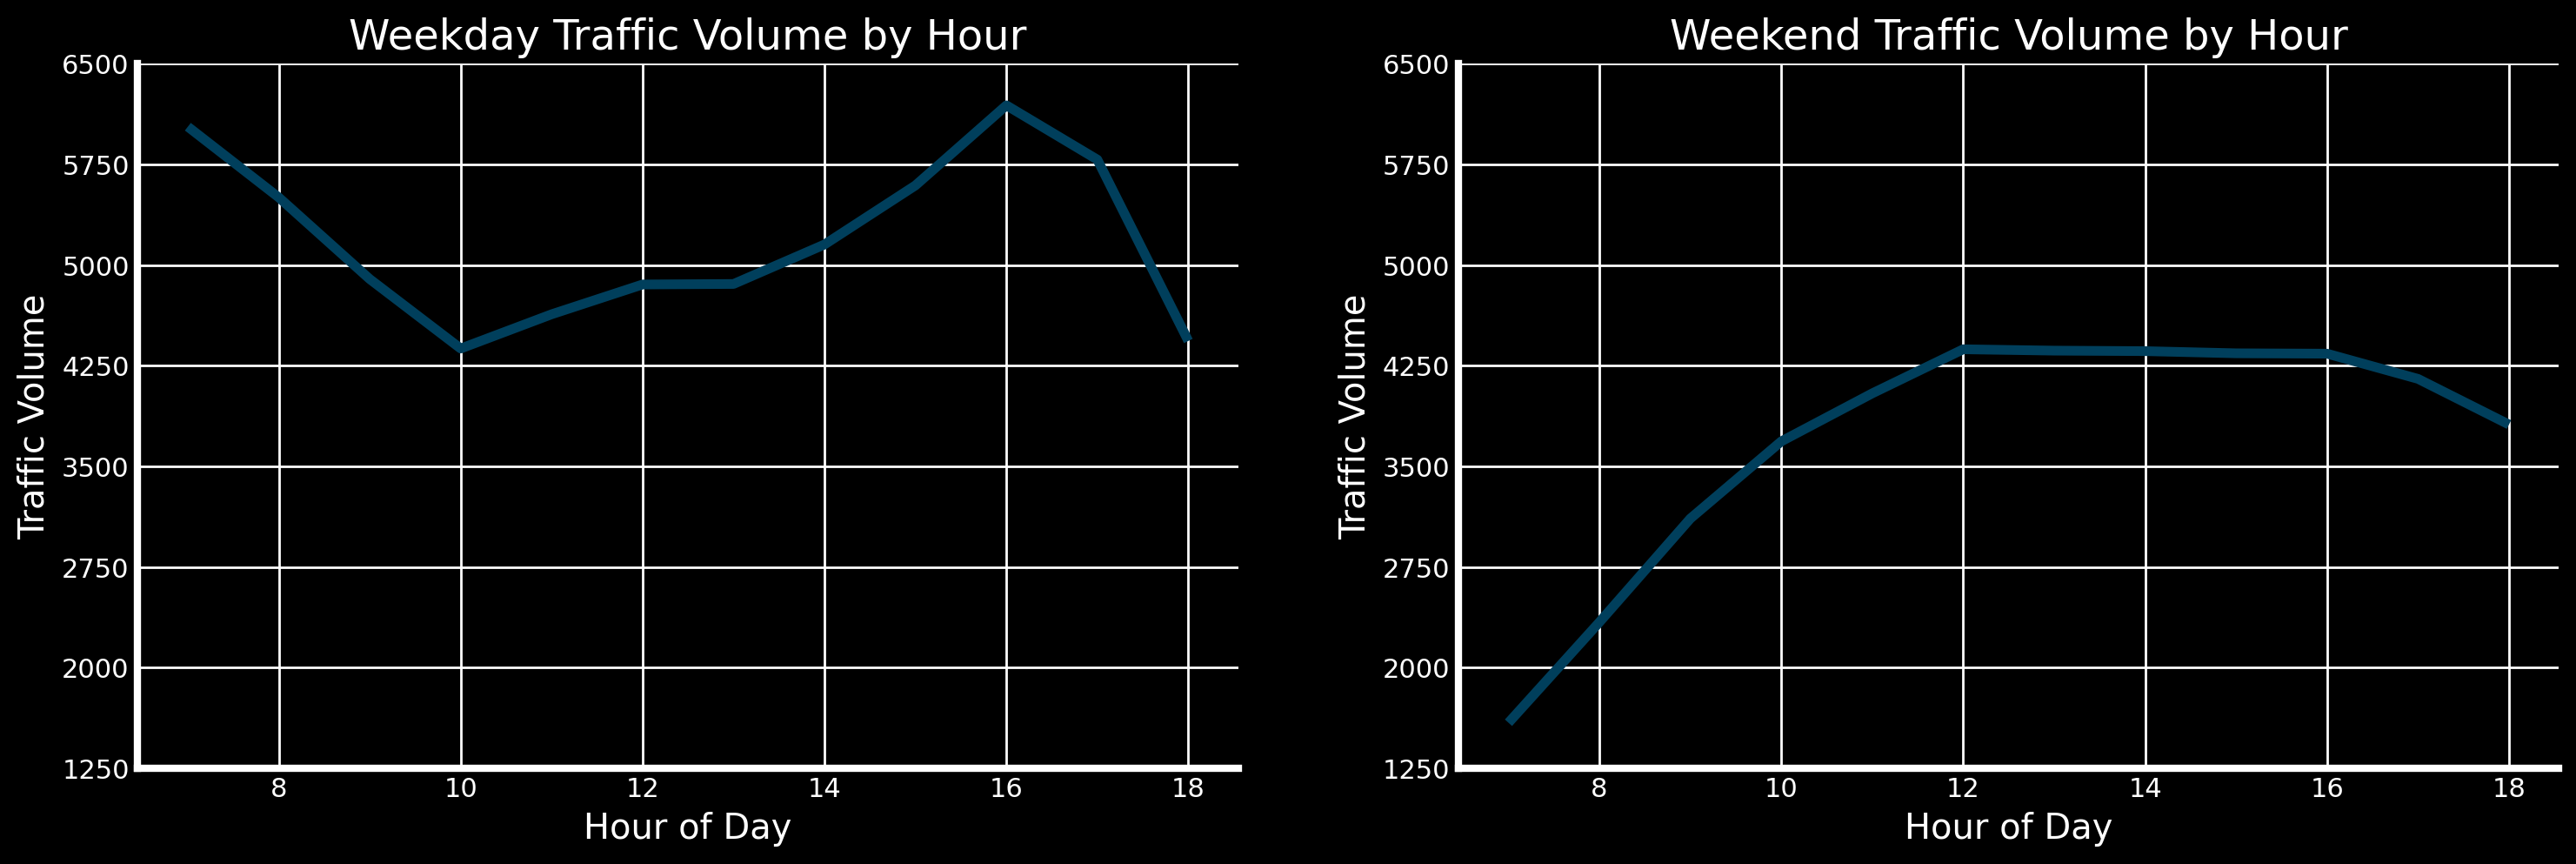

In [583]:
# Create grid
plt.figure()

# Normalize the range
ticks = np.arange(1250, 7000, 750)

# Plot the first chart
plt.subplot(1, 2, 1)
plt.plot(by_hour_weekday['traffic_volume'])
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.yticks(ticks)
plt.title('Weekday Traffic Volume by Hour')

# Plot the second chart
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.yticks(ticks)
plt.title('Weekend Traffic Volume by Hour')


**Observations**
- Weekdays
    - 7:00 am and 4:00 pm seem to have the heaviest traffic, which is consistent with business commuters
- Weekends
    - 12:00 pm - 2:00 pm seems to have the highest traffic during the day on weekends
    - High traffic hours on weekends have roughly the same amount of traffic during low traffic hours on weekdays

### Exploring weather related impact on `traffic_volume`

This dataset contains multiple columns relevant to weather, additional exploration will be done on the column that shows the strongest correlation.

#### Quantitative Measures of Weather

In [584]:
weather_quantitative_columns = ['temp_K', 'rain_mmph', 'snow_mmph', 'cloudcover', 'traffic_volume']
weather_data = traffic[weather_quantitative_columns]

quantitative_weather_correlation = weather_data.corr()['traffic_volume'][:-1]
print(quantitative_weather_correlation)

temp_K        0.132
rain_mmph    -0.022
snow_mmph     0.001
cloudcover    0.067
Name: traffic_volume, dtype: float64


Of the quantitative measures of weather, `temp_K` had the strongest correlation with `traffic_volume` and therefore further investigation necessary to get more information.

**`temp_K` impact on `traffic_volume`**

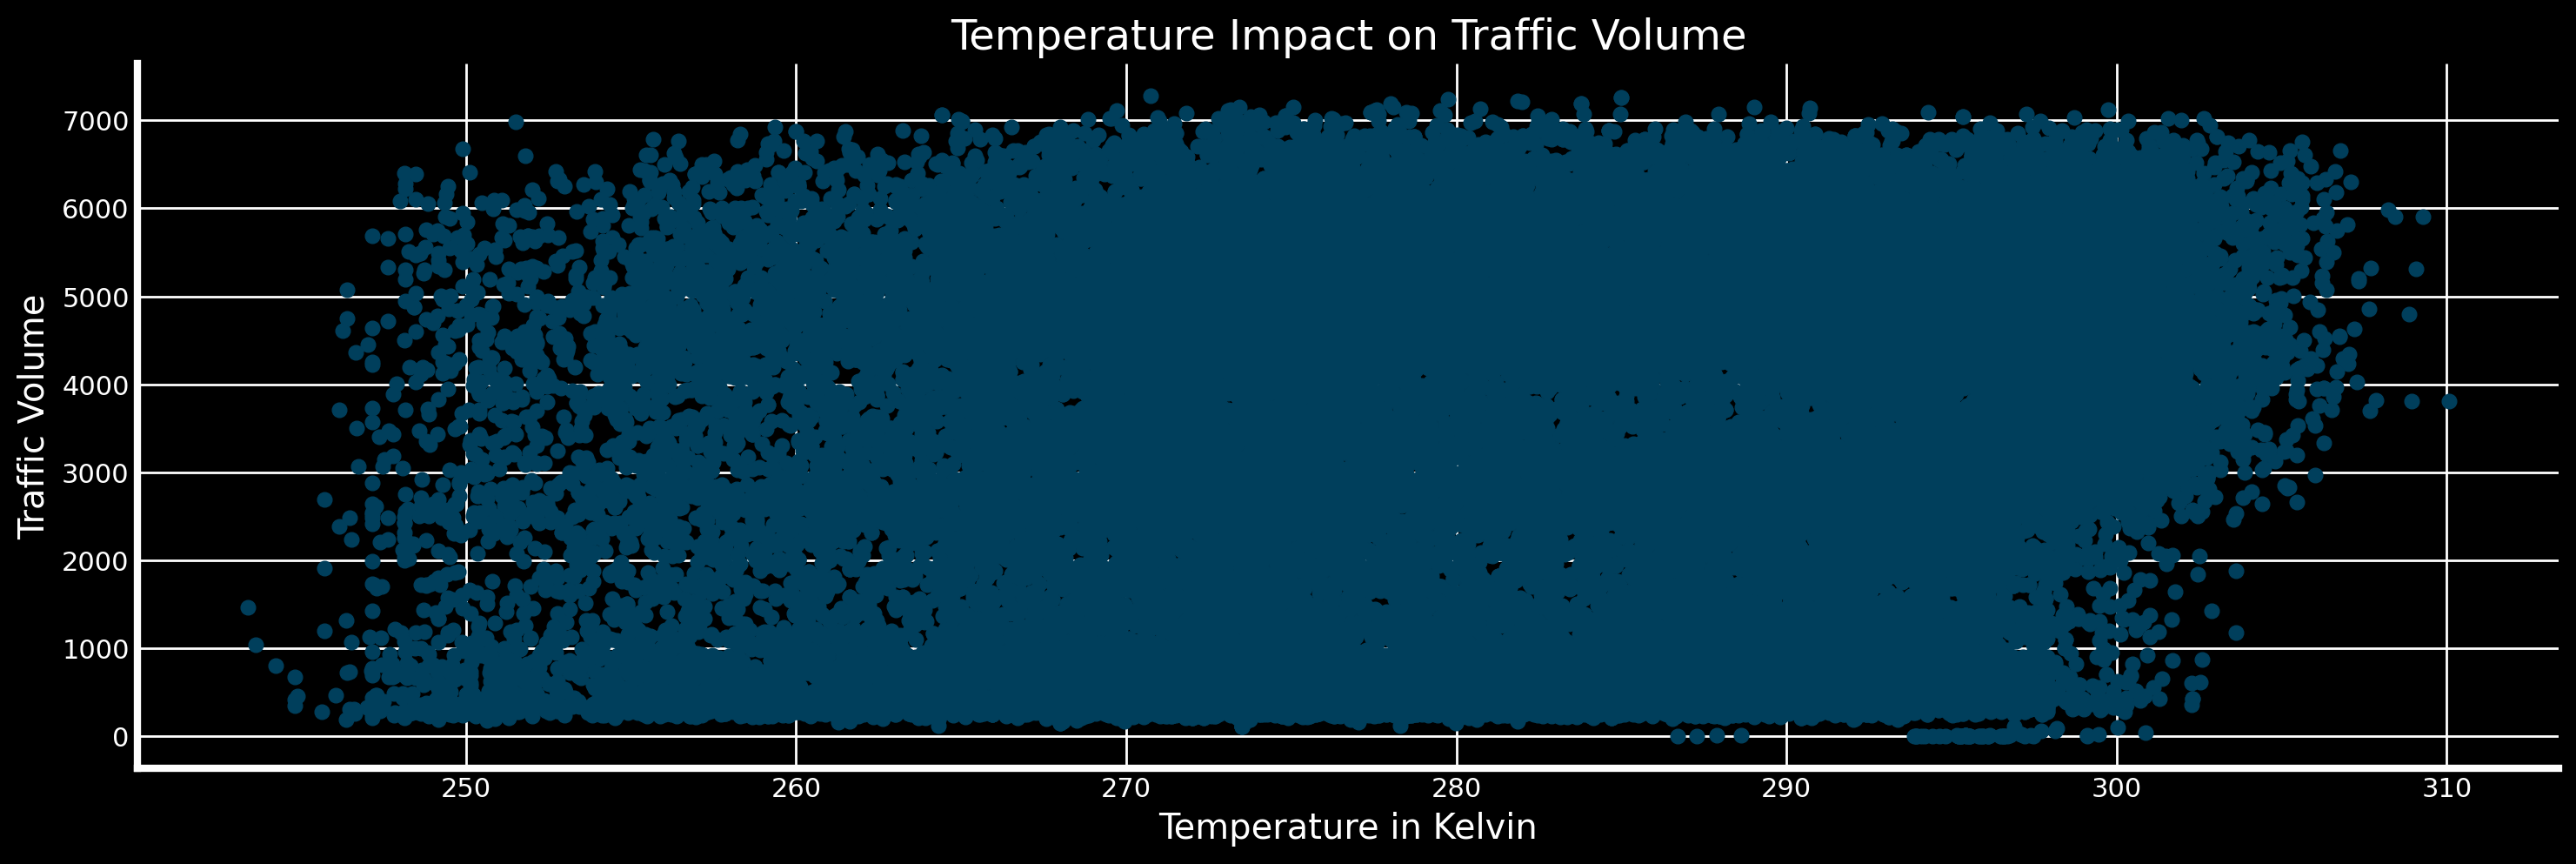

In [585]:
plt.scatter(x=traffic['temp_K'], y=traffic['traffic_volume'])
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Traffic Volume')
plt.title('Temperature Impact on Traffic Volume')
plt.show()

While this column showed the highest amount of correlation, and overall the slight positive correlation is visible, it's not a strong indicator of heavy traffic. 

#### Qualitative Measures of Weather

In [591]:
weather_qualitative_columns = ['weather_main', 'weather_description', 'traffic_volume']
weather_data = traffic[weather_qualitative_columns]

by_weather_main = weather_data.groupby('weather_main').mean()
by_weather_description = weather_data.groupby('weather_description')

print(by_weather_main)
print(by_weather_description)

#by_weather_main.plot.barh('traffic_volume', index='weather_main')

TypeError: Could not convert sky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is ClearSky is ClearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is ClearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearSky is Clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clearsky is clear to numeric

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _subject (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.0.0
- Date: 